<a href="https://colab.research.google.com/github/jgutier1/PROYECTO_INTEGRADO_3/blob/main/F22_Entrega_Final_Proyecto_Integrado_III_8_DIC_2024_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Institución Universitaria Digital de Antioquia

Ingeniería de Software y Datos

Proyecto Integrado III

Profesora: Ana María López

PREICA2402B020107

S20 - Evidencia 2 de Avance - Proyecto Integrado III

Grupo 10

Elaborado por: Juan Carlos Gutiérrez Riaño

Fecha 8 Diciembre de 2024

# **Bibliotecas para el ejercicio**

In [ ]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
from   collections           import Counter
from   datetime              import datetime

# **Explorar el dataset y de conclusiones sobre el mismo para limpieza de datos**

In [ ]:
df = pd.read_csv('Numero_de_Veh_culos_El_ctricos_-_Hibridos_20241027.csv', low_memory=False)

# **Exploracion numero de columnas**

In [ ]:
print(df.columns)

Index(['COMBUSTIBLE', 'ESTADO', 'MODELO', 'FECHA_REGISTRO', 'AÑO_REGISTRO',
       'CLASIFICACION', 'CLASE', 'SERVICIO', 'MARCA', 'LINEA', 'CARROCERIA',
       'CILINDRAJE', 'MODALIDAD', 'ORGANISMO_TRANSITO', 'MUNICIPIO',
       'DEPARTAMENTO', 'CAPACIDAD_CARGA', 'CAPACIDAD_PASAJEROS', 'PESO',
       'POTENCIA', 'EJES', 'CANTIDAD'],
      dtype='object')


# **Clase de datos**

In [ ]:
# Verifico Data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56545 entries, 0 to 56544
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMBUSTIBLE          56545 non-null  object 
 1   ESTADO               56513 non-null  object 
 2   MODELO               56513 non-null  float64
 3   FECHA_REGISTRO       56513 non-null  object 
 4   AÑO_REGISTRO         56513 non-null  float64
 5   CLASIFICACION        56513 non-null  object 
 6   CLASE                56513 non-null  object 
 7   SERVICIO             56513 non-null  object 
 8   MARCA                56513 non-null  object 
 9   LINEA                56513 non-null  object 
 10  CARROCERIA           56513 non-null  object 
 11  CILINDRAJE           53025 non-null  float64
 12  MODALIDAD            36663 non-null  object 
 13  ORGANISMO_TRANSITO   56513 non-null  object 
 14  MUNICIPIO            56513 non-null  object 
 15  DEPARTAMENTO         56513 non-null 

# **Consulta para encontrar el numero de valores nulos por columna**

In [ ]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

COMBUSTIBLE                0
ESTADO                    32
MODELO                    32
FECHA_REGISTRO            32
AÑO_REGISTRO              32
CLASIFICACION             32
CLASE                     32
SERVICIO                  32
MARCA                     32
LINEA                     32
CARROCERIA                32
CILINDRAJE              3520
MODALIDAD              19882
ORGANISMO_TRANSITO        32
MUNICIPIO                 32
DEPARTAMENTO              32
CAPACIDAD_CARGA        50326
CAPACIDAD_PASAJEROS    55235
PESO                    2459
POTENCIA                1027
EJES                    2104
CANTIDAD                  32
dtype: int64


# **Consulta de la 5 primeras filas partiendo de 0 a 4 por cada columna**

In [ ]:
print(df.head(5))

  COMBUSTIBLE  ESTADO  MODELO          FECHA_REGISTRO  AÑO_REGISTRO  \
0   ELECTRICO  ACTIVO  2022.0  06/30/2022 12:00:00 AM        2022.0   
1   ELECTRICO  ACTIVO  2023.0  10/21/2022 12:00:00 AM        2022.0   
2   ELECTRICO  ACTIVO  2014.0  09/28/2015 12:00:00 AM        2015.0   
3   ELECTRICO  ACTIVO  2021.0  08/10/2022 12:00:00 AM        2022.0   
4   ELECTRICO  ACTIVO  2022.0  10/25/2021 12:00:00 AM        2021.0   

  CLASIFICACION        CLASE    SERVICIO     MARCA            LINEA  ...  \
0     AUTOMOVIL          BUS     Público       BYD          BC11S01  ...   
1     AUTOMOVIL    CAMIONETA  Particular       BYD      YUAN PRO EV  ...   
2          MOTO  MOTOCICLETA  Particular  E-MOTORI             VITA  ...   
3     AUTOMOVIL    CAMIONETA     Público  DONGFENG  DFA5030XXYABEV7  ...   
4     AUTOMOVIL    CAMIONETA  Particular       BYD      SONG PRO EV  ...   

   MODALIDAD                 ORGANISMO_TRANSITO  MUNICIPIO  DEPARTAMENTO  \
0  PASAJEROS                  SDM - BOGO

# **Consulta de la 5 ultimas filas por cada columna**

In [ ]:
print(df.tail(5))

      COMBUSTIBLE  ESTADO  MODELO          FECHA_REGISTRO  AÑO_REGISTRO  \
56540   GASO ELEC  ACTIVO  2023.0  10/06/2022 12:00:00 AM        2022.0   
56541   GASO ELEC  ACTIVO  2023.0  10/07/2022 12:00:00 AM        2022.0   
56542   GASO ELEC  ACTIVO  2023.0  10/12/2022 12:00:00 AM        2022.0   
56543   GASO ELEC  ACTIVO  2023.0  09/30/2022 12:00:00 AM        2022.0   
56544   GASO ELEC  ACTIVO  2022.0  11/26/2022 12:00:00 AM        2022.0   

      CLASIFICACION      CLASE    SERVICIO   MARCA  LINEA  ...  MODALIDAD  \
56540     AUTOMOVIL  CAMIONETA  Particular   MAZDA  CX-30  ...  PASAJEROS   
56541     AUTOMOVIL  CAMIONETA  Particular   MAZDA  CX-30  ...        NaN   
56542     AUTOMOVIL  CAMIONETA  Particular   MAZDA  CX-30  ...        NaN   
56543     AUTOMOVIL  CAMIONETA  Particular   MAZDA  CX-30  ...  PASAJEROS   
56544     AUTOMOVIL    CAMPERO  Particular  TOYOTA  RAV 4  ...  PASAJEROS   

                               ORGANISMO_TRANSITO MUNICIPIO  DEPARTAMENTO  \
56540    

# **AVANCE ACTIVIDAD 2**

# **Identifico las columnas numericas para datos nulos**

In [ ]:

columnas_numericas = ['CILINDRAJE', 'CAPACIDAD_CARGA', 'CAPACIDAD_PASAJEROS', 'PESO', 'POTENCIA', 'EJES', 'CANTIDAD']

# **Reemplazo los datos nulos en las columnas numericas con 0 (cero)**

In [ ]:

for col in columnas_numericas:
    df[col] = df[col].fillna(0)

# **Identifico columnas de texto con los datos nulos**

In [ ]:

columnas_texto = ['COMBUSTIBLE', 'ESTADO', 'MODELO', 'CLASIFICACION', 'CLASE', 'SERVICIO', 'MARCA', 'LINEA', 'CARROCERIA', 'MODALIDAD', 'ORGANISMO_TRANSITO', 'MUNICIPIO', 'DEPARTAMENTO']

# **Reemplazo los datos nulos de las columnas de texto con la palabra (Desconocido)**

In [ ]:

for col in columnas_texto:
    df[col] = df[col].fillna('Desconocido')

# **Verifico la limpieza de los datos nulos en todas las columnas tanto numericas como de texto**

In [ ]:

print(df.isnull().sum())

COMBUSTIBLE             0
ESTADO                  0
MODELO                  0
FECHA_REGISTRO         32
AÑO_REGISTRO           32
CLASIFICACION           0
CLASE                   0
SERVICIO                0
MARCA                   0
LINEA                   0
CARROCERIA              0
CILINDRAJE              0
MODALIDAD               0
ORGANISMO_TRANSITO      0
MUNICIPIO               0
DEPARTAMENTO            0
CAPACIDAD_CARGA         0
CAPACIDAD_PASAJEROS     0
PESO                    0
POTENCIA                0
EJES                    0
CANTIDAD                0
dtype: int64


# **Consulto formatos de fecha** **y el resultado fue  satisfactorio, Todas las fechas tienen formato correcto**

In [ ]:

try:
    pd.to_datetime(df['FECHA_REGISTRO'])
    print("Todas las fechas tienen formato correcto")
except Exception as e:
    print("Errores en formato de fecha:")
    # Consulto registros con formato incorrecto
    mascara = pd.to_datetime(df['FECHA_REGISTRO'], errors='coerce').isna()
    print(df[mascara]['FECHA_REGISTRO'])

<ipython-input-13-332fa8955c75>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['FECHA_REGISTRO'])


Todas las fechas tienen formato correcto


# **Identifico valores atípicos en columnas numéricas como 'CILINDRAJE', 'CAPACIDAD_CARGA', 'CAPACIDAD_PASAJEROS', 'PESO', 'POTENCIA', 'EJES', y 'CANTIDAD',  con rango intercuartílico (IQR)**

Los valores atípicos parecen agruparse en dos extremos:

Extremadamente bajos como  0.0.

Extremadamente altos por encima de un límite específico

In [ ]:
columnas = ['CILINDRAJE', 'CAPACIDAD_CARGA', 'CAPACIDAD_PASAJEROS', 'PESO', 'POTENCIA', 'EJES', 'CANTIDAD']

for columna in columnas:
    # Calcular Q1, Q3 e IQR
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar valores atípicos
    valores_atipicos = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    print(f"\nValores atípicos en '{columna}':")
    print(valores_atipicos[columna])



Valores atípicos en 'CILINDRAJE':
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
55997    3445.0
56012    3600.0
56013    3600.0
56014    3600.0
56015    3600.0
Name: CILINDRAJE, Length: 10216, dtype: float64

Valores atípicos en 'CAPACIDAD_CARGA':
3         845.0
9         960.0
22        290.0
23        290.0
39       1265.0
          ...  
55997     721.0
56012     818.0
56013     818.0
56014     818.0
56015     477.0
Name: CAPACIDAD_CARGA, Length: 1901, dtype: float64

Valores atípicos en 'CAPACIDAD_PASAJEROS':
0        49.0
14       49.0
22        2.0
23        2.0
40       28.0
         ... 
37369     5.0
37779     5.0
40231     2.0
42393     5.0
49326     5.0
Name: CAPACIDAD_PASAJEROS, Length: 542, dtype: float64

Valores atípicos en 'PESO':
0        20000.0
2            0.0
9         3195.0
11           0.0
12           0.0
          ...   
56465     3230.0
56466     3000.0
56467     3050.0
56468     3050.0
56504     2790.0
Name

# **consistencia en categorías, valores únicos en columnas categóricas y valores poco comunes (frecuencia baja)**

**Datos encontrados**

45,550+9,574+1,421=   56,545 vehiculosen total

GASO ELEC con el 80.6% vehículos híbridos

ELECTRICO constituye el 16.9% O 100% eléctricos.

DIES ELEC tiene un menor porcentaje 2.5%diésel y electricidad.

-----------------------------------------------------------------------------

Valores poco comunes en ESTADO:  REGISTRADO    1

-----------------------------------------------------------------------------

La columna 'CLASIFICACION' no tiene valores atipicos

AUTOMOVIL: 54,682 registros (96.7%)

MOTO: 1,623 registros (2.9%)

MOTOCARRO: 240 registros (0.4%)

----------------------------------------------------------------------------

La columna 'CLASE'
CAMIONETA: 29,565 registros 52.3%

AUTOMOVIL: 17,061 registros 30.2%

CAMPERO: 4,541 registros 8.0%

**Valores atípicos identificados**

CUATRIMOTO: 3 registros

TRACTOCAMION: 1 registro

----------------------------------------------------------------------------

Servicios:

Particular: 52,701 registros 93.2%

Público: 3,575 registros 6.3%

Oficial: 269 registros 0.5%

Lamyoria son de servicio particular como tendencia en la mayoria de regiones no se encontro valores atipicos

In [ ]:
#categoricas
columnas_categoricas = ['COMBUSTIBLE', 'ESTADO', 'CLASIFICACION', 'CLASE', 'SERVICIO']

for columna in columnas_categoricas:
    print(f"\nValores únicos en {columna}:")
    print(df[columna].value_counts())

    # comunes de (frecuencia baja)
    valores_raros = df[columna].value_counts()[df[columna].value_counts() < 5]
    if len(valores_raros) > 0:
        print(f"Valores poco comunes en {columna}:")
        print(valores_raros)


Valores únicos en COMBUSTIBLE:
COMBUSTIBLE
GASO ELEC                                                                                                                                                                                                                                 45522
ELECTRICO                                                                                                                                                                                                                                  9570
DIES ELEC                                                                                                                                                                                                                                  1421
ELECTRICO,ACTIVO,2021,08/06/2021 12:00:00 AM,2021,AUTOMOVIL,CAMIONETA,Oficial,BYD,YUAN EV 400 GS,WAGON,,,DIR DPTAL TTOyTTE SAN ANDRES ISLAS,SAN ANDRES,"Archipielago de San Andres, Providencia",,,1870,94,2,1                              

# **Consulto los valores atipicos en las columnas numericas y tambien los datos alejados del resto de los datos aplicando método IQR**

# **Inconsistencias encontradas**

CILINDRAJE:

valor 0.00 y hasta 2 son muy bajos podrían ser indicar datos faltantes o fueron los que se rellenaron con 0

vehículos con cilindrada cero dato no se ingresó correctamente

cilindraje superiores a 10,000 podrían ser de vehículos como camiones o errores en los datos ya que la mayoría de los vehículos suelen tener una cilindrada mucho menor

--------------------------------------------------------------------------

CARGA:
los datos con cero puede ser un eror o carros que no tienen capacidad de carga, otros datos de 10.000 ,hasta 30.000 puedenser error o carros como camiones

Promedio (mean): 55.16
Desviación estándar (std): 458.20
Valor mínimo (min): 0.00
Primer cuartil (25%): 0.00
Mediana (50%): 0.00
Tercer cuartil (75%): 0.00
Valor máximo (max): 30,000.00

---------------------------------------------------------------------------

PASAJEROS:

Como el primer cuartil (25%), la mediana (50%) y el tercer cuartil (75%) tienen el valor de  0 sugiere que la mayoría de los vehículos registrados no tienen  capacidad de transportar pasajeros.

En las columnas como 49, 50, 53, 161. muestra una grancapacidad de transporte de pasajeros , esto podrian ser autobuses

----------------------------------------------------------------------------

PESO:

como en las columnas anteriores los valores 0 indican datos faltantes o errores de digitacion

Tenemos valores como 20,000, 25,000, 50,000 y  60,000 estos valores son muy altos por que si la mayoria de vehiculos son de transporte particular no superan los  2,410

-----------------------------------------------------------------------------

POTENCIA:

como en las columnas anteriores los valores 0 indican datos faltantes o errores de digitacion

S aprecia valores altos como 8,000, 10,000, 80,000. los cuales son mayores que el promedio de 169.46 indicado valores exagerados o depronto son
camiones y tambien se nota por valores alejados del promedio

----------------------------------------------------------------------------

EJES:

como en las columnas anteriores los valores 0 indican datos faltantes o errores de digitacion

valores atípicos son 0, 3, 21, 1, 5, y 4
 encuanto a los valores de 2 al 3 es normal en carros pequenños o semicargueros , de 3 a 5 pueden ser camiones pero el dato mas atipico es 21

In [ ]:
# columnas numéricas atipico
for columna in columnas_numericas:
    print(f"\nEstadísticas para {columna}:")
    print(df[columna].describe())

    # atípicos usando el método IQR o datos alejados del resto de los datos en un conjunto
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    atipicos = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
    if len(atipicos) > 0:
        print(f"Valores atípicos en {columna}:")
        print(atipicos[columna].unique())


Estadísticas para CILINDRAJE:
count    56545.000000
mean      1620.218675
std        895.762908
min          0.000000
25%       1242.000000
50%       1798.000000
75%       1998.000000
max      14618.000000
Name: CILINDRAJE, dtype: float64
Valores atípicos en CILINDRAJE:
[0.0000e+00 1.0000e+02 7.0000e+01 9.0000e+01 5.0000e+01 6.0000e+01
 3.5000e+01 8.0000e+01 9.7000e+01 7.2000e+01 9.9000e+01 1.0000e+00
 3.0000e+01 2.0000e+00 7.6980e+03 1.0000e+01 1.2000e+04 4.9000e+01
 7.0000e+00 1.4618e+04 4.7640e+03 4.0090e+03 3.6000e+03 3.4970e+03
 3.4560e+03 4.7600e+03 4.9990e+03 3.5000e+03 1.2700e+04 3.4450e+03
 3.9820e+03 5.9670e+03 3.9960e+03 3.8280e+03 1.1470e+04 4.2600e+03
 3.3110e+03 6.1740e+03 4.4600e+03 6.0000e+03 1.0831e+04 3.9070e+03
 7.6360e+03 4.1640e+03 3.7600e+03 8.7000e+03 5.7000e+03 3.9900e+03]

Estadísticas para CAPACIDAD_CARGA:
count    56545.000000
mean        55.154779
std        458.195283
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
m

# **Grafico los valores atipicos en modelo de caja**

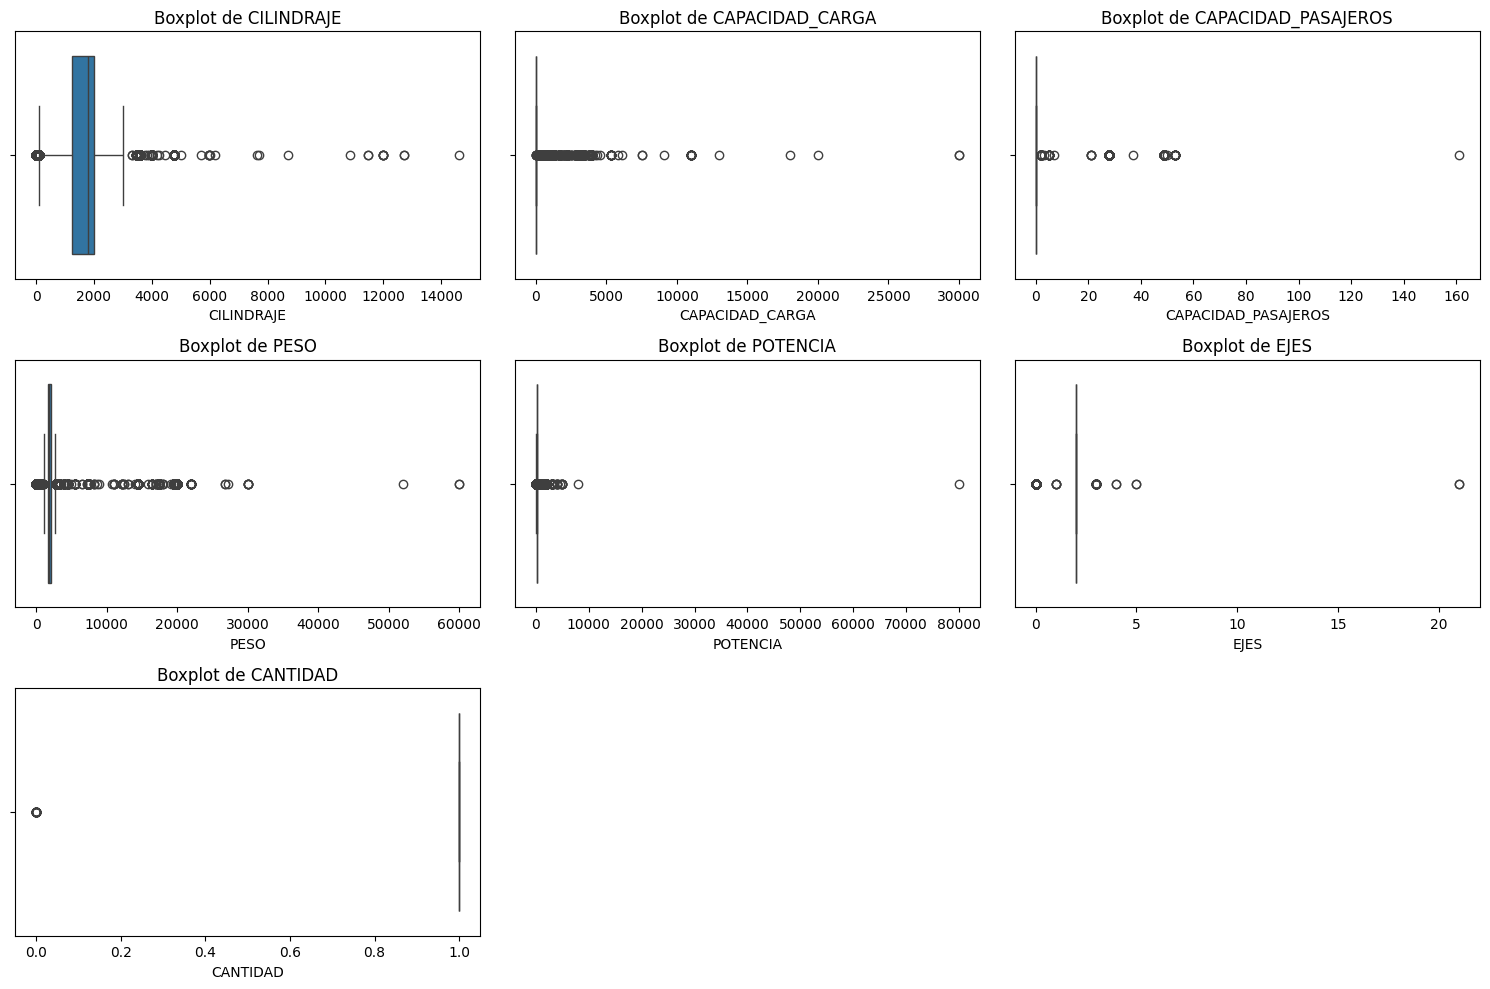

In [ ]:



columnas_numericas = ['CILINDRAJE', 'CAPACIDAD_CARGA', 'CAPACIDAD_PASAJEROS', 'PESO', 'POTENCIA', 'EJES', 'CANTIDAD']

# Graficar boxplots para cada columna numérica
plt.figure(figsize=(15, 10))

for i, columna in enumerate(columnas_numericas):
    plt.subplot(3, 3, i + 1)  # Ajusta el número de filas y columnas según sea necesario
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')
    plt.xlabel(columna)

plt.tight_layout()
plt.show()

# **DISPERCION**

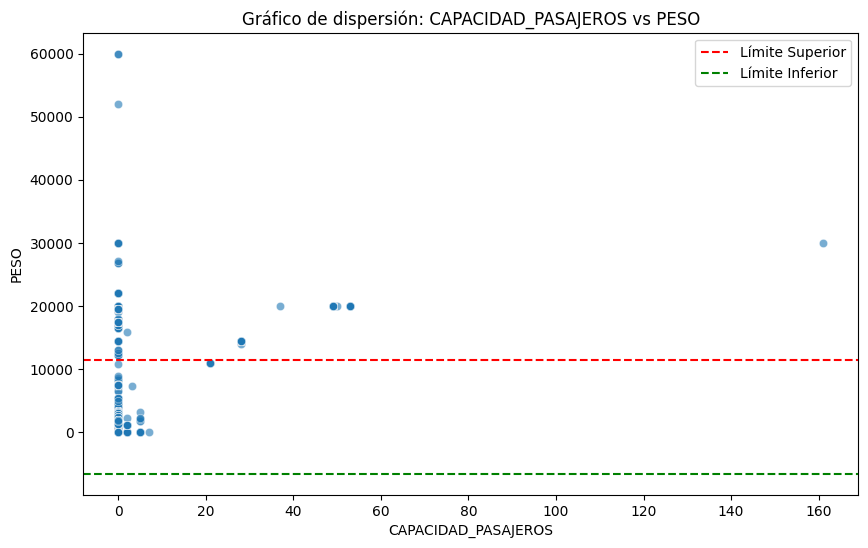

In [ ]:
#Gráfico de dispersión entre CAPACIDAD_PASAJEROS y PESO
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CAPACIDAD_PASAJEROS', y='PESO', alpha=0.6)

# líneas de referencia para identificar valores atípicos
plt.axhline(y=df['PESO'].mean() + 3*df['PESO'].std(), color='r', linestyle='--', label='Límite Superior')
plt.axhline(y=df['PESO'].mean() - 3*df['PESO'].std(), color='g', linestyle='--', label='Límite Inferior')

plt.title('Gráfico de dispersión: CAPACIDAD_PASAJEROS vs PESO')
plt.xlabel('CAPACIDAD_PASAJEROS')
plt.ylabel('PESO')
plt.legend()
plt.show()

# **HISTOGRAMA**

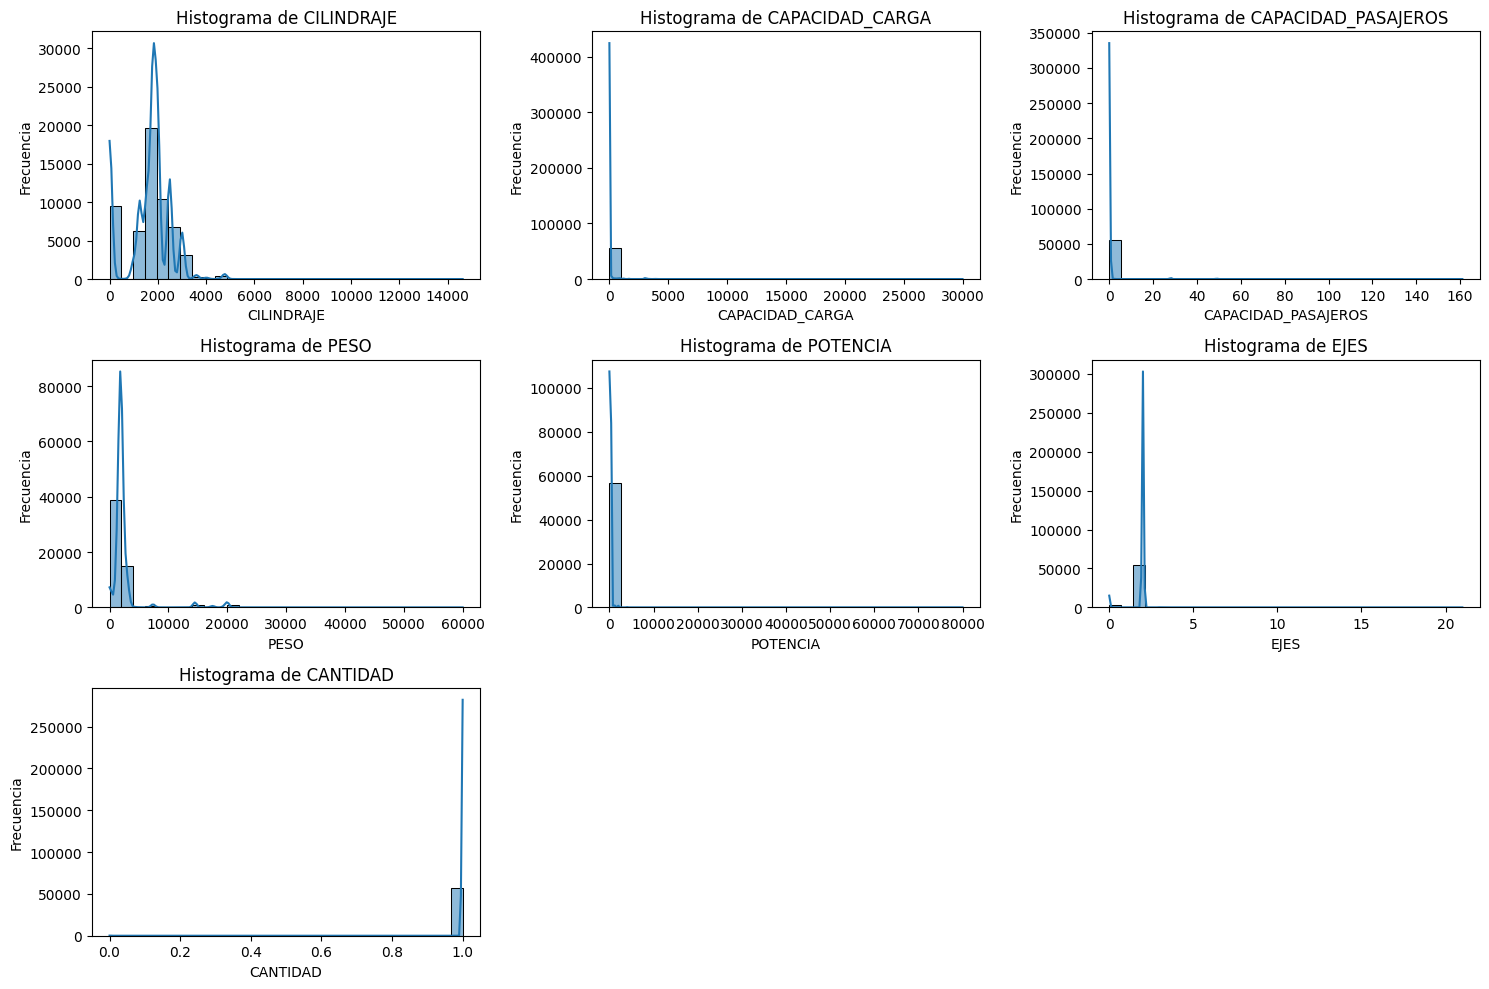

In [ ]:
# cada columna numérica
plt.figure(figsize=(15, 10))

for i, columna in enumerate(columnas_numericas):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[columna], bins=30, kde=True)  # kde para la estimación de la densidad
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# **Mejor utilizo INTERACTIVO , este facilita mejor las capacidades de carga y pasajeros**

In [ ]:
import plotly.express as px

# dispersión pero interactivo
fig = px.scatter(df, x='CAPACIDAD_PASAJEROS', y='PESO', title='Gráfico de dispersión: CAPACIDAD_PASAJEROS vs PESO')
fig.add_hline(y=df['PESO'].mean() + 3*df['PESO'].std(), line_color='red', line_dash='dash', annotation_text='Límite Superior', annotation_position="top right")
fig.add_hline(y=df['PESO'].mean() - 3*df['PESO'].std(), line_color='green', line_dash='dash', annotation_text='Límite Inferior', annotation_position="bottom right")
fig.show()



---





---



# **AVANCE ACTIVIDAD 3**



---



# **Despues del filtrado se  identifican los datos relevantes para contestar las hipótesis planteadas visualizar las metricas**










---



# **Hipótesis 1:**


*Los automóviles eléctricos de más potencia son los que más se venden en Colombia*


Para esto , nos centramos  en los vehículos eléctricos (COMBUSTIBLE = 'ELECTRICO') para tomar cuantos registros de venta según la potencia


***Resultado ***

se detecta que las potencias mas frecuentes buscada por los usuarios son las del hedch 5 primeras

el resultado de 1345 datos con 0 son resultados de los datos vacios reemplazados por 0,

La hipotesis resulta ser cierta por que la cantidad de vehículos solo eléctricos registrados muestra que el consumidor prefiere los carros de mas potencia.

402 kW: 793 vehículos.
  ​

# **TOTAL CARROS SOLO ELECTRICO**

**5 potencias mas frecuentes registradas por los compradores**

In [ ]:
#  solo vehículos eléctricos
electricos_potencia = df[df['COMBUSTIBLE'] == 'ELECTRICO']

# potencia y sumo las cantidades registradas
potencia_vehiculo = (
    electricos_potencia.groupby('POTENCIA')['CANTIDAD']
    .sum()
    .reset_index()
    .sort_values(by='CANTIDAD', ascending=False)
)

# primeras filas del análisis
potencia_vehiculo.head()

,POTENCIA,CANTIDAD
0,0.0,1345.0
87,402.0,793.0
76,268.0,756.0
11,15.0,755.0
60,161.0,630.0


In [ ]:
total_soloelectrico = electricos_potencia['CANTIDAD'].sum()
total_soloelectrico


9570.0

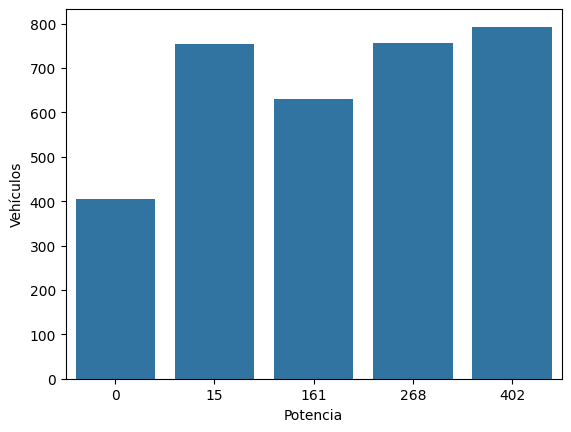

In [ ]:


data = {'Potencia': [402, 268, 15, 161, 0], 'Vehículos': [793, 756, 755, 630, 406]}
df = pd.DataFrame(data)

# gráfica de barras
sns.barplot(x='Potencia', y='Vehículos', data=df)
plt.show()



---



# **Hipótesis 2:**


*Las marcas chinas son las más vendidas en el mercado colombiano*


Esta hipotesis **no** la puedo responder con detalle por que esta mal planteada , los datos que tengo no me permiten tener un Variable que de la descripcion del ORIGEN DE FABRICACION del vehiculo.

Se presume que  marcas chinas son las más vendidas en el mercado colombiano pero no es certero

El unico Resultado que puedo sacar con los datos es el numero de marcas de vehiculos electricos e hibridos que se venden en nuestro pais.

**Número de marcas únicas: 182**

mas complemento el resultado con las 10 marcas mas vendidas como parte de la presuncion de venta de carros chinos que asumenel liderasgo

BYD	2506, RENAULT	1409, BMW	910, ENERGY MOTION	461. DONGFENG	410, STARK	406, NISSAN	314, ZHIDOU	314, MINI	275
ORANSH	190




In [ ]:
# numero de las marcas   únicas
marcas_únicas = electricos_potencia['MARCA'].nunique()
print("Número de marcas únicas:", marcas_únicas)

Número de marcas únicas: 182


In [ ]:
conteo_marcas = electricos_potencia['MARCA'].value_counts()

**DEMACIADO SATURADA LA INFORMACION**

<Axes: ylabel='MARCA'>

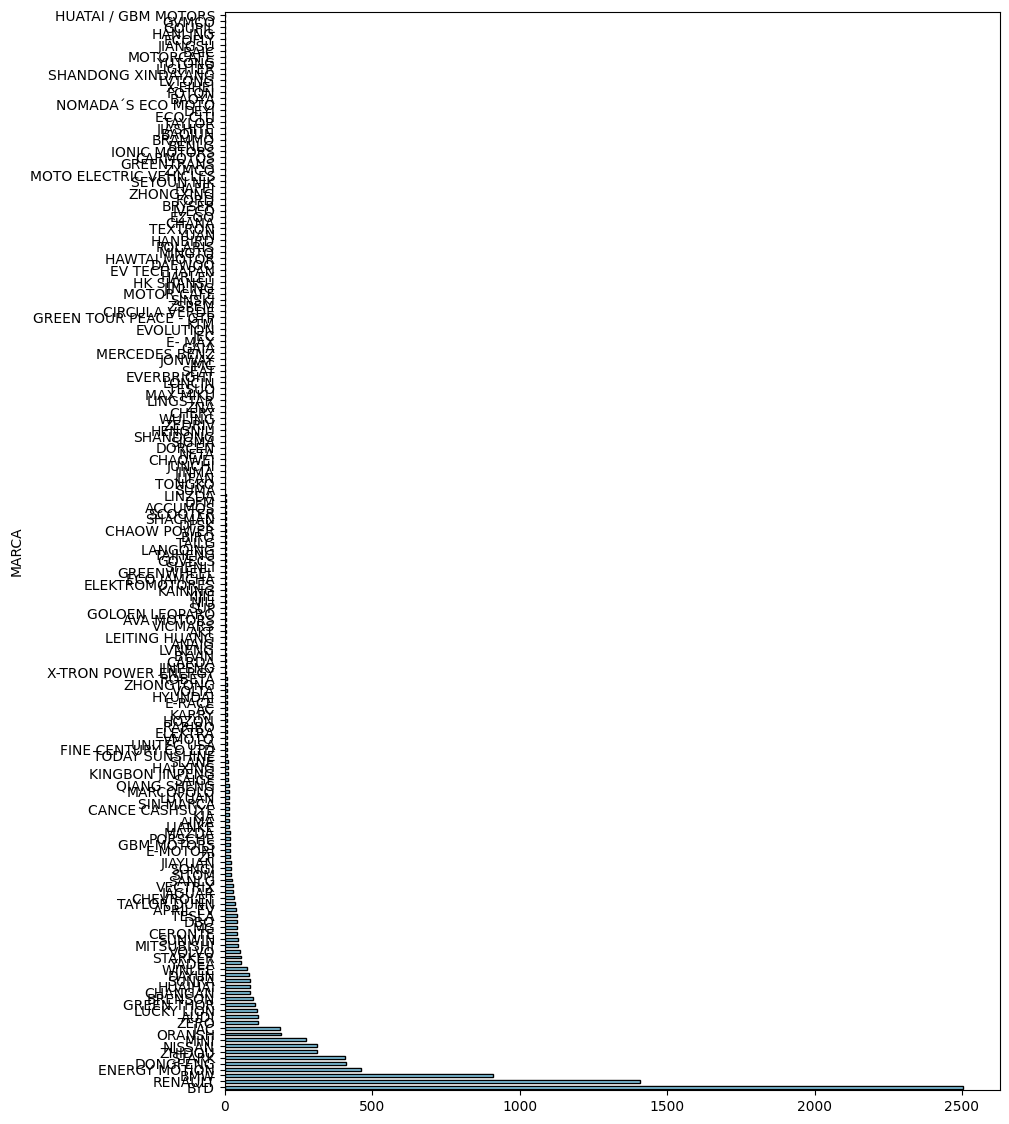

In [ ]:
plt.figure(figsize=(10, 14))
conteo_marcas.plot(kind='barh', color='skyblue', edgecolor='black')

**RESUMO A LAS 10 MARCAS MAS VENDIDAS Y GRAFICO**

In [ ]:
top_10_marcas = conteo_marcas.head(10)
top_10_marcas

,count
MARCA,
BYD,2503
RENAULT,1409
BMW,910
ENERGY MOTION,461
DONGFENG,410
STARK,406
ZHIDOU,314
NISSAN,313
MINI,275


<Axes: xlabel='MARCA'>

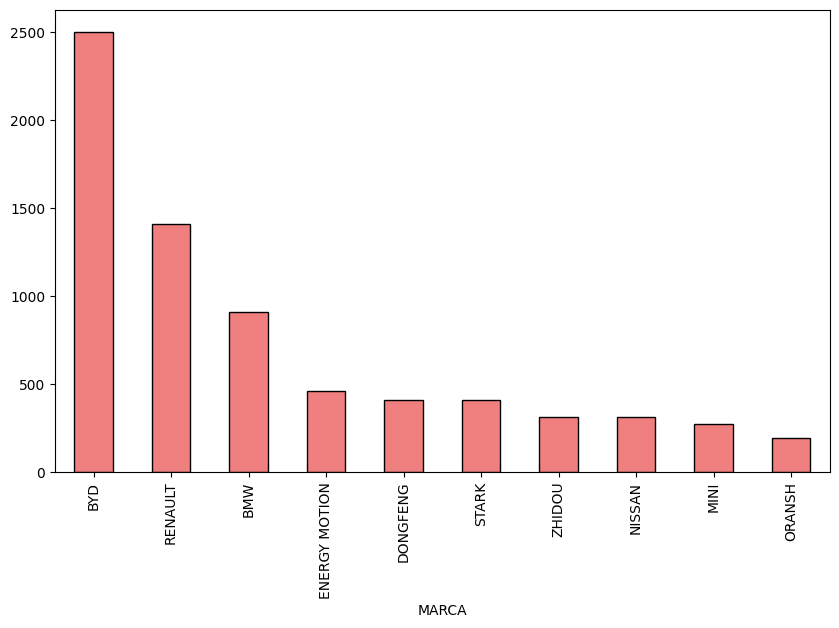

In [ ]:
plt.figure(figsize=(10, 6))
top_10_marcas.plot(kind='bar', color='lightcoral', edgecolor='black')

# **Hipótesis 3:**

La destinación de los vehículos eléctricos comprados en Colombia son la mayoría para
pasajeros y los de servicios para carga son menores


La hipotesis resulta ser cierta segun los datos filtrados el servicio mayoricario es para pasajeros con 5407 unidades registradas y los de carga son **1223 registros** , tambien se obtuvo datos de vehiculos de uso mixto y otros que no especificaron

In [ ]:
conteo_destinacion = electricos_potencia['MODALIDAD'].value_counts()
print(conteo_destinacion)

MODALIDAD
PASAJEROS      5407
Desconocido    2858
CARGA          1223
MIXTO            82
Name: count, dtype: int64


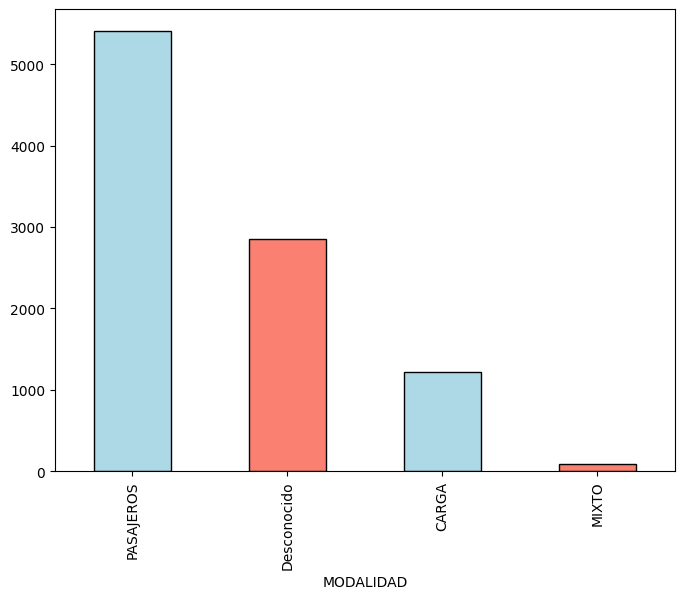

In [ ]:
plt.figure(figsize=(8, 6))
conteo_destinacion.plot(kind='bar', color=['lightblue', 'salmon'], edgecolor='black')



#  gráfica
plt.show()

# **Hipótesis 4:**

*El vehiculo electrico preferido por el consumidor colombiano es de tipo sedan*

Esta hipotesis **no es correcta**  el vehiculo mas vendido o de preferencia por los clientes es de tipo

**HATCH BACK -------------                2177**

seguido de la carroceria
**CERRADA  -------------                  1624**
la cual presumo que es un carro de 2 puestas pequeño

mientras los sedan estan en
**SEDAN-------------------156**





In [ ]:
conteo_destinacion = electricos_potencia['CARROCERIA'].value_counts()
print(conteo_destinacion)

CARROCERIA
SIN CARROCERIA             2526
HATCH BACK                 2176
CERRADA                    1624
WAGON                      1101
FURGON                      512
PANEL                       456
COUPE                       340
ESTIBAS                     214
SEDAN                       156
DOBLE CABINA CON PLATON     120
VAN                         100
TURISMO                      97
PICO                         31
DOBLE CABINA                 28
PLATAFORMA                   11
ESTACAS                       9
CABINADO                      8
PLATON                        7
SPORT                         6
ABIERTO (ESCALERA)            6
STATION WAGON                 6
BUGGY                         5
PICO (PICK UP)                5
PLANCHON - PLATAFORMA         4
ARTICULADO                    4
SEMICERRADA                   4
CARPADO                       4
SCOOTER                       3
CONVERTIBLE                   2
GRUA                          2
SIN CARROCERÍA               

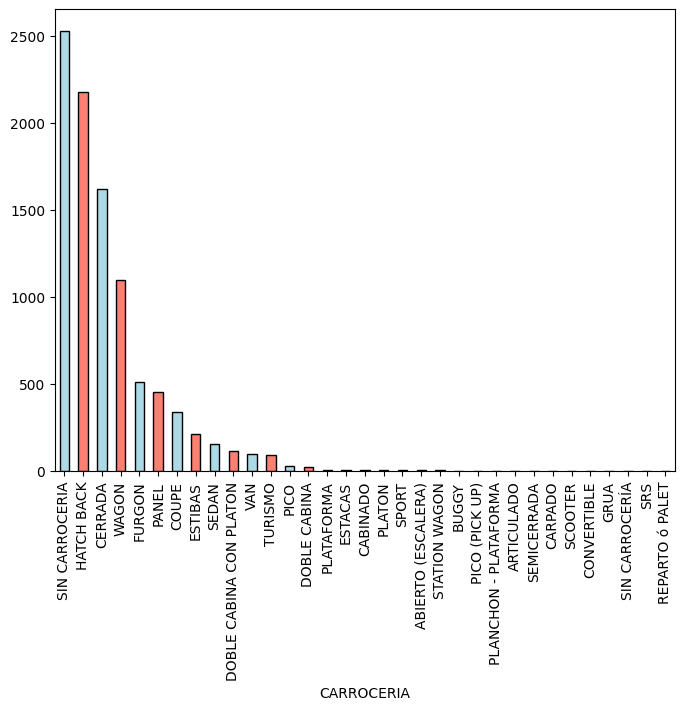

In [ ]:
plt.figure(figsize=(8, 6))
conteo_destinacion.plot(kind='bar', color=['lightblue', 'salmon'], edgecolor='black')



#  gráfica
plt.show()

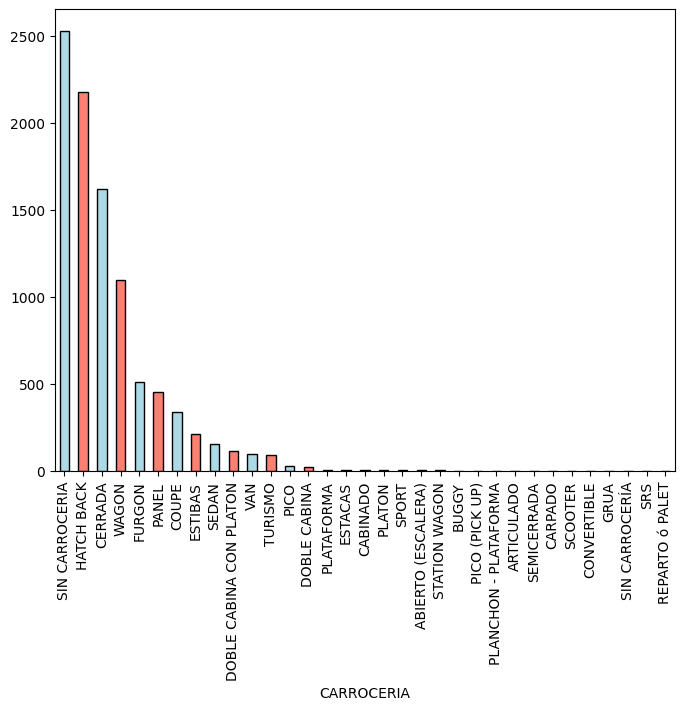

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
conteo_destinacion.plot(kind='bar', color=['lightblue', 'salmon'], edgecolor='black')



#  gráfico
plt.show()

<BarContainer object of 10 artists>

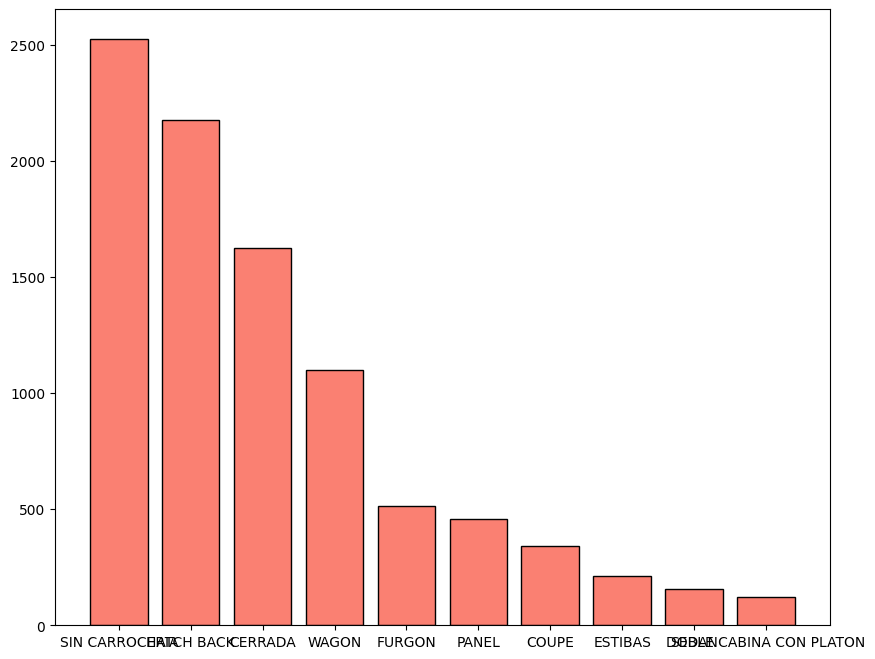

In [ ]:
top_10_carrocerias = dict(sorted(conteo_destinacion.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(10, 8))
plt.bar(top_10_carrocerias.keys(), top_10_carrocerias.values(), color='salmon', edgecolor='black')

# **Resumen Métricas de Éxito**

**Número de ventas: Total, de registros de ventas por marca**

In [ ]:
ventas_por_marca = electricos_potencia.groupby('MARCA').size().reset_index(name='Total de Ventas')

# marcas más vendidas
ventas_por_marca = ventas_por_marca.sort_values('Total de Ventas', ascending=False)

# primeros 5
print(ventas_por_marca.head())

             MARCA  Total de Ventas
17             BYD             2503
127        RENAULT             1409
13             BMW              910
46   ENERGY MOTION              461
36        DONGFENG              410


**Promedio de ventas segun la potencia y el modelo:Comparar estos promedios de ventas entre las diferentes modelos eléctricos y los híbridos (diésel o gasolina)**

In [ ]:
# APOTENCIA y MODELO  contar registros
ventas_por_potencia_modelo = (
    electricos_potencia.groupby(['POTENCIA', 'MODELO'])
    .size()
    .reset_index(name='Total de Ventas')
)

#total de ventas con los 10 más vendidos
top_10_potencia_modelo = ventas_por_potencia_modelo.sort_values('Total de Ventas', ascending=False).head(10)


print(top_10_potencia_modelo)

     POTENCIA  MODELO  Total de Ventas
232     268.0  2022.0              674
250     402.0  2021.0              397
251     402.0  2022.0              330
58       15.0  2016.0              299
189     161.0  2022.0              283
6         0.0  2014.0              253
186     161.0  2019.0              244
72       20.0  2022.0              214
51       10.0  2020.0              211
3         0.0  2011.0              195


**Distribución por servicio: Análisis del porcentaje de ventas por tipo de vehículo (sedan, carga)**

se encontro que:

SEDAN   ---           156 ----   1.629413 %


Total de ventas de vehículos de modalidad de carga: 992
Porcentaje de vehículos de carga: 10.36%

In [ ]:
# tipo de vehículo columna 'CARROCERIA' para saber  las ventas
ventas_por_tipo = electricos_potencia.groupby('CARROCERIA').size().reset_index(name='Total de Ventas')

# porcentaje
ventas_por_tipo['Porcentaje'] = (ventas_por_tipo['Total de Ventas'] / ventas_por_tipo['Total de Ventas'].sum()) * 100

#  orden descendente
ventas_por_tipo = ventas_por_tipo.sort_values('Porcentaje', ascending=False)


print(ventas_por_tipo)


                 CARROCERIA  Total de Ventas  Porcentaje
25           SIN CARROCERIA             2526   26.394984
14               HATCH BACK             2176   22.737722
5                   CERRADA             1624   16.969697
32                    WAGON             1101   11.504702
12                   FURGON              512    5.350052
15                    PANEL              456    4.764890
7                     COUPE              340    3.552769
11                  ESTIBAS              214    2.236155
23                    SEDAN              156    1.630094
9   DOBLE CABINA CON PLATON              120    1.253918
31                      VAN              100    1.044932
30                  TURISMO               97    1.013584
16                     PICO               31    0.323929
8              DOBLE CABINA               28    0.292581
19               PLATAFORMA               11    0.114943
10                  ESTACAS                9    0.094044
3                  CABINADO    

In [ ]:
# Total  dataset (todas las ventas)
total_ventas = len(electricos_potencia)

# modalidad de carga
modalidad_carga = electricos_potencia[electricos_potencia['CARROCERIA'].str.contains('FURGON|PLATAFORMA|ESTACAS|PANEL', case=False, na=False)]

# ventas de modalidad de carga
total_ventas_carga = len(modalidad_carga)

# porcentaje
porcentaje_carga = (total_ventas_carga / total_ventas) * 100


print("Total de ventas:", total_ventas)
print("Total de ventas de vehículos de modalidad de carga:", total_ventas_carga)
print(f"Porcentaje de vehículos de carga: {porcentaje_carga:.2f}%")


Total de ventas: 9570
Total de ventas de vehículos de modalidad de carga: 992
Porcentaje de vehículos de carga: 10.37%


**Tendencias de ventas por año: Analizar cómo han cambiado las ventas a lo largo de los años para identificar patrones.**

In [ ]:
#  datetime
electricos_potencia['FECHA_REGISTRO'] = pd.to_datetime(electricos_potencia['FECHA_REGISTRO'])

# año
electricos_potencia['AÑO'] = electricos_potencia['FECHA_REGISTRO'].dt.year

# año y ventas
ventas_por_año = electricos_potencia.groupby('AÑO').size().reset_index(name='Total de Ventas')

# tendencias
print(ventas_por_año)


<ipython-input-39-7a48f228a3da>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



     AÑO  Total de Ventas
0   2010               44
1   2011              108
2   2012              150
3   2013              300
4   2014              251
5   2015              508
6   2016              431
7   2017              247
8   2018              443
9   2019              979
10  2020             1407
11  2021             1535
12  2022             3167


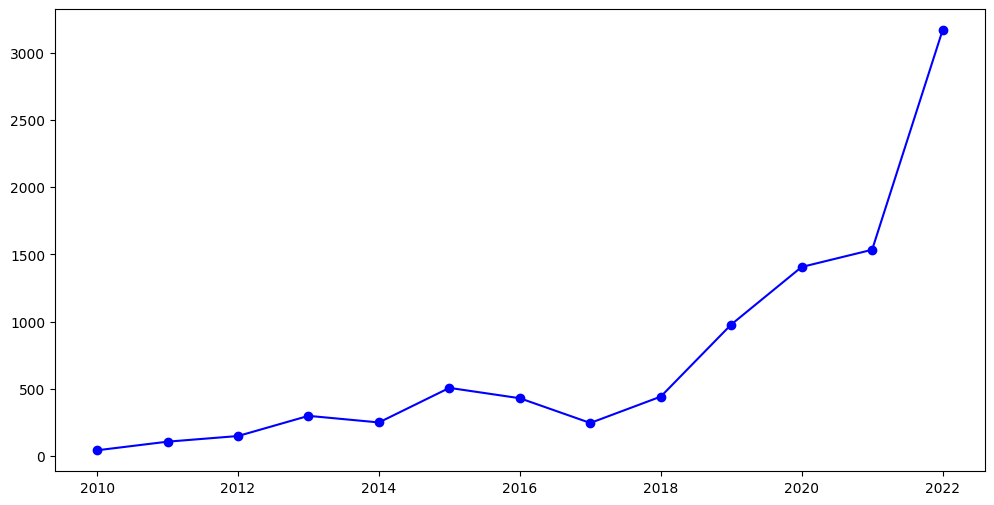

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ventas_por_año['AÑO'], ventas_por_año['Total de Ventas'], marker='o', color='blue', linestyle='-')

**Análisis por municipio o departamento: Identificar en qué municipios se realizan más ventas y si hay diferencias significativas**

In [ ]:
# MUNICIPIO y  ventas
ventas_por_municipio = electricos_potencia.groupby('MUNICIPIO').size().reset_index(name='Total de Ventas')

# mayor a menor número de ventas
ventas_por_municipio = ventas_por_municipio.sort_values('Total de Ventas', ascending=False)

# municipio con más ventas
print("Municipio con más ventas:")
print(ventas_por_municipio.head(1))

# 10 municipios con más ventas
print("\nTop 10 municipios con más ventas:")
print(ventas_por_municipio.head(10))


Municipio con más ventas:
  MUNICIPIO  Total de Ventas
9    BOGOTA             4677

Top 10 municipios con más ventas:
   MUNICIPIO  Total de Ventas
9     BOGOTA             4677
75  MEDELLIN             1009
37  ENVIGADO              617
43     FUNZA              438
99  SABANETA              368
8      BELLO              356
30      COTA              232
13      CALI              157
54    GUARNE              145
40   FLORIDA              125


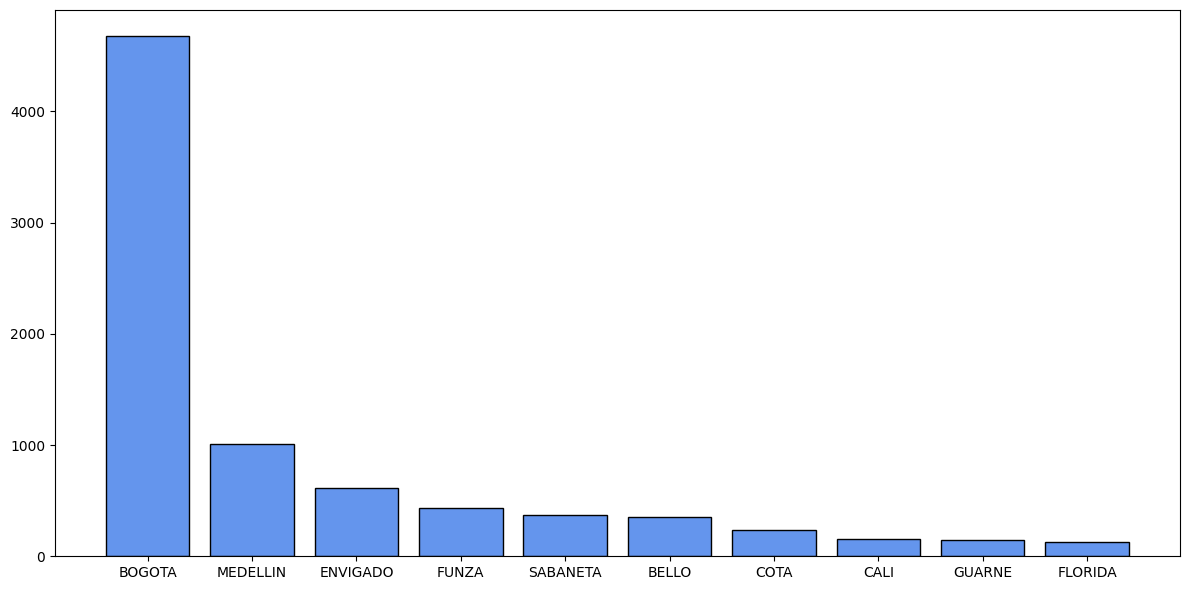

In [ ]:
#  10 municipios con más ventas
top_10_municipios = ventas_por_municipio.head(10)

# gráfico
plt.figure(figsize=(12, 6))
plt.bar(
    top_10_municipios['MUNICIPIO'],
    top_10_municipios['Total de Ventas'],
    color='cornflowerblue',
    edgecolor='black'
)



plt.tight_layout()
plt.show()

# **Evidencia del Daschboard hecho en Power BI**

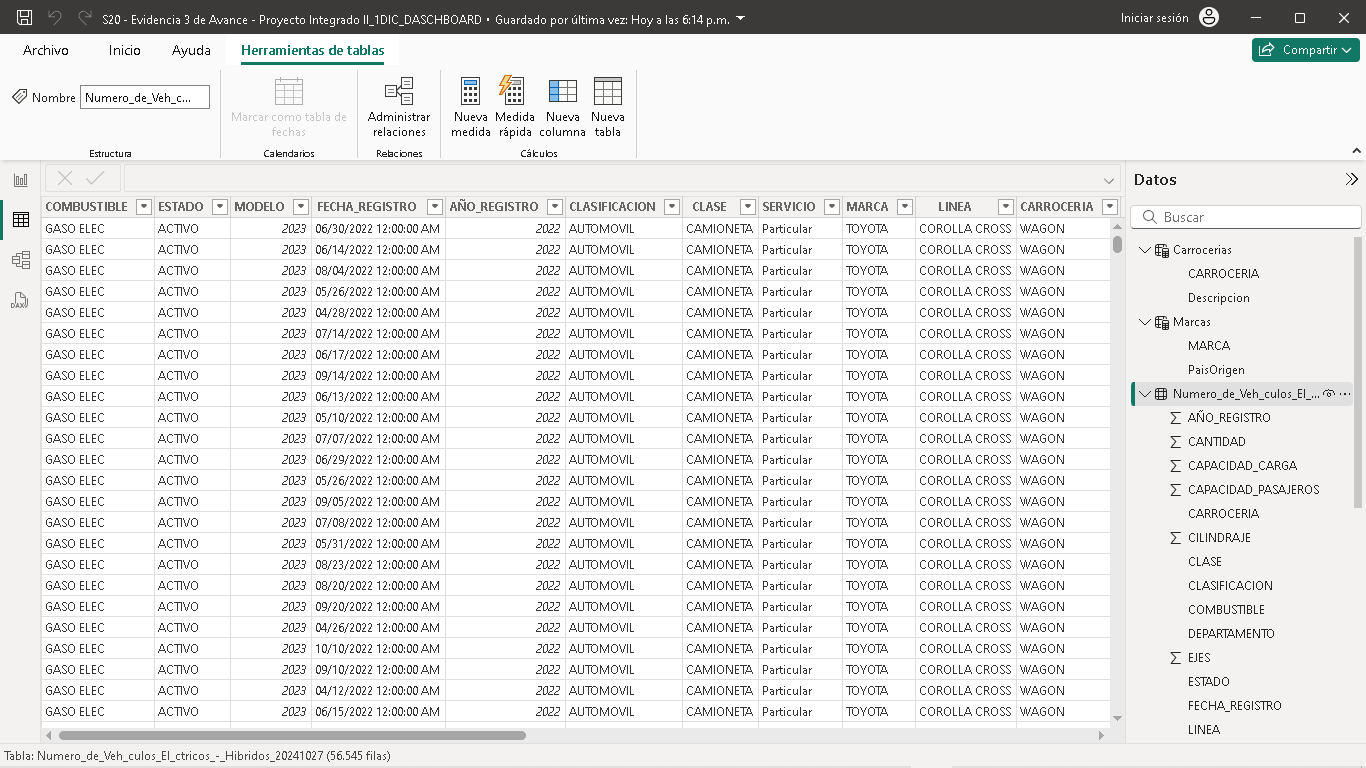

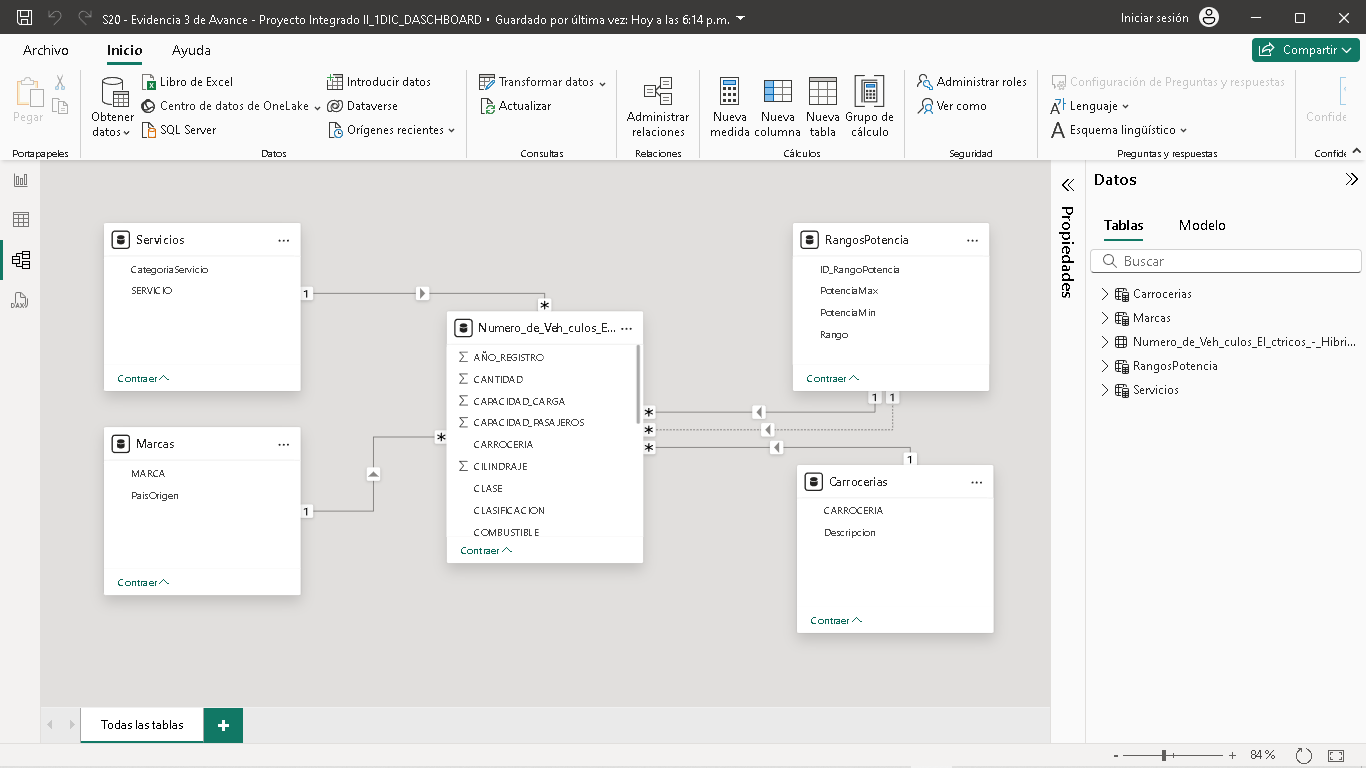

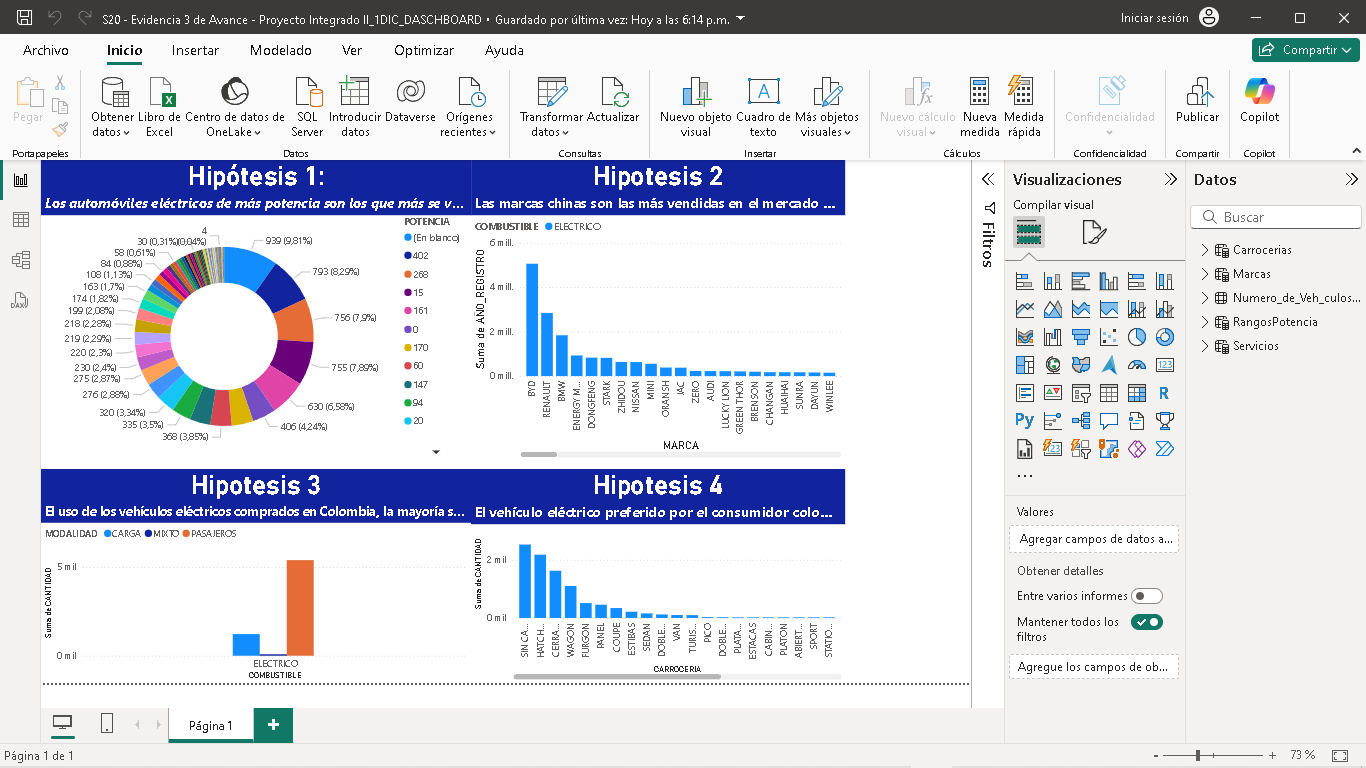